# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import backtrader as bt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.datasets import make_regression
%matplotlib inline

# Data fetching

In [2]:
df=yf.download("^NSEI",period="1y")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-10 00:00:00+05:30,17566.099609,17566.099609,17442.800781,17534.750000,17534.750000,312700
2022-08-11 00:00:00+05:30,17711.650391,17719.300781,17631.949219,17659.000000,17659.000000,311200
2022-08-12 00:00:00+05:30,17659.650391,17724.650391,17597.849609,17698.150391,17698.150391,303900
2022-08-16 00:00:00+05:30,17797.199219,17839.099609,17764.050781,17825.250000,17825.250000,0
2022-08-17 00:00:00+05:30,17868.150391,17965.949219,17833.349609,17944.250000,17944.250000,262800
...,...,...,...,...,...,...
2023-08-03 00:00:00+05:30,19463.750000,19537.650391,19296.449219,19381.650391,19381.650391,315700
2023-08-04 00:00:00+05:30,19462.800781,19538.849609,19436.449219,19517.000000,19517.000000,280800
2023-08-07 00:00:00+05:30,19576.849609,19620.449219,19524.800781,19597.300781,19597.300781,216600


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-08-10 00:00:00+05:30 to 2023-08-09 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,18123.866345,18193.516279,18028.319919,18113.089355,18113.089355,261425.403226
std,708.929396,698.821310,718.708871,712.722259,712.722259,73014.872035
min,16798.050781,17026.050781,16747.699219,16818.099609,16818.099609,0.000000
25%,17649.949707,17716.763184,17527.274414,17623.600586,17623.600586,223925.000000
50%,18044.399414,18101.849609,17896.250000,18027.924805,18027.924805,254850.000000
75%,18551.249512,18606.487793,18449.962402,18518.087402,18518.087402,284475.000000
max,19850.900391,19991.849609,19758.400391,19979.150391,19979.150391,696500.000000


# Feature Engineering

In [5]:
#Daily returns: Daily returns 
df['Returns'] = (df['Close'] / df['Close'].shift(1)) - 1

In [6]:
#Volatility measures
n=50
df['Std_Dev'] = df['Returns'].std()
df['Rolling_Std_Dev'] = df['Returns'].rolling(window=n).std()

In [7]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Returns,Std_Dev,Rolling_Std_Dev
Date,,,,,,,,,
2022-08-10 00:00:00+05:30,17566.099609,17566.099609,17442.800781,17534.750000,17534.750000,312700,NaN,0.007188,NaN
2022-08-11 00:00:00+05:30,17711.650391,17719.300781,17631.949219,17659.000000,17659.000000,311200,0.007086,0.007188,NaN
2022-08-12 00:00:00+05:30,17659.650391,17724.650391,17597.849609,17698.150391,17698.150391,303900,0.002217,0.007188,NaN
2022-08-16 00:00:00+05:30,17797.199219,17839.099609,17764.050781,17825.250000,17825.250000,0,0.007182,0.007188,NaN
2022-08-17 00:00:00+05:30,17868.150391,17965.949219,17833.349609,17944.250000,17944.250000,262800,0.006676,0.007188,NaN
2022-08-18 00:00:00+05:30,17898.650391,17968.449219,17852.050781,17956.500000,17956.500000,263900,0.000683,0.007188,NaN
2022-08-19 00:00:00+05:30,17966.550781,17992.199219,17710.750000,17758.449219,17758.449219,295600,-0.011029,0.007188,NaN
2022-08-22 00:00:00+05:30,17682.900391,17690.050781,17467.349609,17490.699219,17490.699219,287600,-0.015077,0.007188,NaN
2022-08-23 00:00:00+05:30,17357.349609,17625.550781,17345.199219,17577.500000,17577.500000,285600,0.004963,0.007188,NaN


In [8]:
# Average true range

high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
df["ATR"]= true_range.rolling(n).sum()/n

In [9]:
# Simple Moving Average and Exponential Moving Average

df['SMA_50'] = df['Close'].rolling(window=n).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()
df['EMA'] = df['Close'].ewm(span=n, adjust=False).mean()


In [10]:
# Relative strength index

delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean().abs()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [11]:
#Moving Average Convergence Divergence (MACD)

exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [12]:
#Bollinger Bands

df['MA'] = df['Close'].rolling(window=n).mean()
df['BB_upper'] = df['MA'] + (df['Close'].rolling(window=n).std() * 2)
df['BB_lower'] = df['MA'] - (df['Close'].rolling(window=n).std() * 2)


In [13]:
# On-Balance Volume (OBV)

df['OBV'] = np.where(df['Close'] > df['Close'].shift(1), df['Volume'], \
                      np.where(df['Close'] < df['Close'].shift(1), -df['Volume'], 0)).cumsum()


In [14]:
# Chaikin Money Flow (CMF)

mfv = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
mfv *= df['Volume']
df['CMF'] = mfv.rolling(window=n).sum() / df['Volume'].rolling(window=n).sum()


In [15]:
q = df['Volume']         #Calculate Volume Weighted Average Price of a data set
p = df['Close']
df["VWAP"]=(p * q).sum() / q.sum()

In [16]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,...,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-10 00:00:00+05:30,17566.099609,17566.099609,17442.800781,17534.750000,17534.750000,312700,NaN,0.007188,NaN,NaN,...,17534.750000,NaN,0.000000,0.000000,NaN,NaN,NaN,0,NaN,18091.94327
2022-08-11 00:00:00+05:30,17711.650391,17719.300781,17631.949219,17659.000000,17659.000000,311200,0.007086,0.007188,NaN,NaN,...,17539.622549,NaN,9.911681,1.982336,NaN,NaN,NaN,311200,NaN,18091.94327
2022-08-12 00:00:00+05:30,17659.650391,17724.650391,17597.849609,17698.150391,17698.150391,303900,0.002217,0.007188,NaN,NaN,...,17545.839327,NaN,20.687397,5.723348,NaN,NaN,NaN,615100,NaN,18091.94327
2022-08-16 00:00:00+05:30,17797.199219,17839.099609,17764.050781,17825.250000,17825.250000,0,0.007182,0.007188,NaN,NaN,...,17556.796608,NaN,39.033157,12.385310,NaN,NaN,NaN,615100,NaN,18091.94327
2022-08-17 00:00:00+05:30,17868.150391,17965.949219,17833.349609,17944.250000,17944.250000,262800,0.006676,0.007188,NaN,NaN,...,17571.990859,NaN,62.454670,22.399182,NaN,NaN,NaN,877900,NaN,18091.94327
2022-08-18 00:00:00+05:30,17898.650391,17968.449219,17852.050781,17956.500000,17956.500000,263900,0.000683,0.007188,NaN,NaN,...,17587.069649,NaN,81.070332,34.133412,NaN,NaN,NaN,1141800,NaN,18091.94327
2022-08-19 00:00:00+05:30,17966.550781,17992.199219,17710.750000,17758.449219,17758.449219,295600,-0.011029,0.007188,NaN,NaN,...,17593.790416,NaN,78.932452,43.093220,NaN,NaN,NaN,846200,NaN,18091.94327
2022-08-22 00:00:00+05:30,17682.900391,17690.050781,17467.349609,17490.699219,17490.699219,287600,-0.015077,0.007188,NaN,NaN,...,17589.747624,NaN,54.998985,45.474373,NaN,NaN,NaN,558600,NaN,18091.94327
2022-08-23 00:00:00+05:30,17357.349609,17625.550781,17345.199219,17577.500000,17577.500000,285600,0.004963,0.007188,NaN,NaN,...,17589.267325,NaN,42.545202,44.888539,NaN,NaN,NaN,844200,NaN,18091.94327


In [17]:
new_df=df.dropna()

In [18]:
new_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,...,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700,0.001929,0.007188,0.006733,173.827070,...,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200,-0.010399,0.007188,0.006812,174.250078,...,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327
2023-01-05 00:00:00+05:30,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900,-0.002815,0.007188,0.006796,175.314102,...,18172.444119,53.474754,-74.458628,-48.429295,18300.218008,18818.731918,17781.704097,1156100,0.125938,18091.94327
2023-01-06 00:00:00+05:30,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200,-0.007376,0.007188,0.006856,177.763086,...,18160.169809,51.254067,-92.084162,-57.160269,18302.668008,18811.383842,17793.952174,917900,0.109206,18091.94327
2023-01-09 00:00:00+05:30,17952.550781,18141.400391,17936.150391,18101.199219,18101.199219,257200,0.013536,0.007188,0.007104,181.098086,...,18157.857237,53.096907,-85.559048,-62.840025,18308.955977,18799.078268,17818.833685,1175100,0.120478,18091.94327


**Returns:** Returns are calculated by comparing the price of an asset at the end of a period to its price at the beginning of                the same period. The return is expressed as a percentage of the initial investment. Positive returns indicate a                  profit, while negative returns indicate a loss.
             By calculating returns, we can analyze the performance of a trading strategy and make informed decisions about our              trades.

**Std_dev:** It measures how much the price of an asset varies from its average price over a given period of time. In trading,                standard deviation is used to assess the risk associated with a particular investment. A higher standard deviation              indicates that the asset's price has been more volatile and unpredictable over the given time period

**Rolling_std_dev:** It is calculated by taking the standard deviation of a moving window of data, which is shifted forward one             data point at a time. rolling standard deviation is an important tool in trading analysis that allows traders to                 more accurately measure an asset's volatility over time, identify trends and patterns, and adjust their trading                 strategies accordingly.

**ATR(Average True Range):** It measures the average range of price movement for an asset over a specified period of time.The               primary use of ATR in trading analysis is to help traders understand the potential risk associated with a particular
            trade. A higher ATR indicates that an asset has a higher degree of volatility, which means that the price can move               more significantly in either direction. This can be an indication that the trade carries a higher level of risk.
                 ATR is also useful in setting stop loss orders, which are orders placed to sell an asset when its price falls               below a certain level. By using ATR to set the stop loss level, traders can take into account the asset's volatility             and set a level that is appropriate for the amount of risk they are willing to take on.
                 In addition, ATR can also be used to identify potential trend reversals. If the ATR is increasing while the
            asset's price is decreasing, this may indicate that the asset is oversold and may be due for a reversal.Conversely,             if the ATR is decreasing while the asset's price is increasing, this may indicate that the asset is overbought and               may be due for a reversal.
                 
**SMA:** It is calculated by taking the average of a security's price over a specified period of time, and it is used to                  identify trends and potential buy or sell signals.
            One reason why traders use SMA is to smooth out price fluctuations and identify the overall trend of a security. By          using a moving average, traders can filter out the noise in the market and get a clearer view of the direction in which          the price is moving.
            Another reason why SMA is popular is because it can be used to generate buy and sell signals. When the price of a            security crosses above the SMA, it is considered a bullish signal, indicating that the price may continue to rise.              Conversely, when the price crosses below the SMA, it is considered a bearish signal, indicating that the price may              continue to fall.
            
**EMA:** It is similar to Simple Moving Average (SMA) in that it is used to identify trends and potential buy or sell signals,            but it differs in the way it is calculated and the weight it assigns to recent price data.
            EMA places more weight on the most recent price data, while still considering the historical data. This means that            it reacts more quickly to changes in price trends than SMA. This makes it particularly useful in fast-moving markets,            where traders need to be able to react quickly to changes in the market.
            EMA is also used to identify potential support and resistance levels. When the price of a security is trading above          the EMA, it is considered a bullish signal, indicating that the price may continue to rise. Conversely, when the price          is trading below the EMA, it is considered a bearish signal, indicating that the price may continue to fall.
            EMA is a powerful tool that can help traders to make informed trading decisions, but it should be used in                    combination with other indicators and analysis techniques to confirm trends and signals. It is important to note that            EMA, like any other technical indicator, is not a guaranteed predictor of future price movements and should be used in          conjunction with proper risk management strategies.


**RSI:** Relative Strength Index (RSI) is another commonly used technical indicator in trading analysis. It is a momentum                oscillator that measures the speed and change of price movements, indicating whether a security is overbought or                oversold.
            RSI is calculated by comparing the average gains and losses of a security over a specified period of time. It ranges          from 0 to 100, with readings above 70 indicating that a security is overbought and readings below 30 indicating that it          is oversold.
            Traders use RSI to identify potential trend reversals and confirm buy or sell signals. When the RSI is overbought,            it suggests that the security is due for a price correction or a trend reversal, and traders may consider selling or            taking profits. Conversely, when the RSI is oversold, it suggests that the security may be undervalued and due for a            price rebound, and traders may consider buying or entering a long position.
        
**MACD:** Moving Average Convergence Divergence (MACD) is a commonly used technical indicator in trading analysis. It is a                 trend-following momentum indicator that helps traders to identify potential buy and sell signals.
            MACD can also be used to identify divergences between the MACD line and the price of a security. When the price of a           security is making new highs or lows, but the MACD line is not confirming the move, it suggests that the trend may be           losing momentum and a potential trend reversal may be on the horizon.
            
**Signal_line:** The Signal line is a technical indicator used in trading analysis that is often used in conjunction with the              Moving Average Convergence Divergence (MACD) indicator. The Signal line is the 9-period exponential moving average              (EMA) of the MACD line.
              The Signal line is used to generate buy and sell signals when it crosses above or below the MACD line. When the              MACD line crosses above the Signal line, it is considered a bullish signal, indicating that the price may continue to            rise. Conversely, when the MACD line crosses below the Signal line, it is considered a bearish signal, indicating                that the price may continue to fall.

**MA:** Moving Average (MA) is a commonly used technical indicator in trading analysis. It is a trend-following indicator that           helps traders to identify potential support and resistance levels and confirm trend direction.
           A Moving Average is calculated by taking the average price of a security over a specified period of time, such as 10,         20, 50, or 200 days. The MA line is plotted on a chart and can be used to smooth out price fluctuations and provide a           clearer view of the overall trend.
           Traders use Moving Averages to identify potential buy and sell signals. When the price of a security crosses above           the MA line, it is considered a bullish signal, indicating that the price may continue to rise. Conversely, when the             price crosses below the MA line, it is considered a bearish signal, indicating that the price may continue to fall.
           Moving Averages can also be used to identify potential support and resistance levels. When the price of a security           approaches the MA line from below, it may act as a support level, preventing the price from falling further. When the           price approaches the MA line from above, it may act as a resistance level, preventing the price from rising further.

**BB_upper and BB_lower:** Bollinger Bands (BB) are a popular technical analysis tool used in trading analysis to identify                     potential buy and sell signals. Bollinger Bands consist of three lines: the middle line, which is a simple moving               average (MA), and two outer bands that are plotted two standard deviations away from the middle line.
                  The upper Bollinger Band represents two standard deviations above the middle line, while the lower Bollinger                 Band represents two standard deviations below the middle line. The distance between the upper and lower bands will               vary depending on the volatility of the security being analyzed.
                  Traders use the upper and lower Bollinger Bands to identify potential support and resistance levels. When the               price of a security approaches or touches the upper Bollinger Band, it is considered overbought, and a potential                 sell signal may be generated. Conversely, when the price of a security approaches or touches the lower Bollinger                 Band, it is considered oversold, and a potential buy signal may be generated.
                  The width of the Bollinger Bands can also provide information about the volatility of a security. If the                     Bollinger Bands are wide, it may indicate that the security is highly volatile, while narrow Bollinger Bands may                 indicate low volatility.

**OBV:** On-Balance Volume (OBV) is a technical indicator used in trading analysis to measure the strength of buying and selling          pressure behind a security. OBV is based on the premise that volume is a key indicator of price movements.
           OBV is calculated by adding the volume on up days and subtracting the volume on down days. If the price of a security          closes higher than the previous day, the volume is added to the OBV. If the price of a security closes lower than the            previous day, the volume is subtracted from the OBV. If the price is unchanged, the volume is not added or subtracted.
           Traders use OBV to confirm trends and identify potential buying and selling signals. If the price of a security is            trending higher, and the OBV line is also trending higher, it is considered a bullish signal, indicating that the                buying pressure is increasing. Conversely, if the price of a security is trending lower, and the OBV line is also                trending lower, it is considered a bearish signal, indicating that the selling pressure is increasing.
           OBV can also be used to identify potential support and resistance levels. If the price of a security is trending              higher, and the OBV line is flat or trending lower, it may indicate that the trend is losing momentum and a potential            trend reversal may be on the horizon. Similarly, if the price of a security is trending lower, and the OBV line is flat          or trending higher, it may indicate that the selling pressure is losing momentum, and a potential trend reversal may be          on the horizon.

**CMF:** Chaikin Money Flow (CMF) is a technical indicator used in trading analysis to measure the buying and selling pressure            behind a security. CMF combines price and volume data to determine the strength of the buying and selling pressure.
           CMF is calculated by taking the sum of the Accumulation/Distribution Line (ADL) over a specified period and dividing          it by the sum of the volume over the same period. The ADL is calculated by adding the money flow multiplier to the              previous day's ADL, where the money flow multiplier is calculated by multiplying the volume by the percentage change in          price.
           Traders use CMF to confirm trends and identify potential buying and selling signals. If the CMF is above zero, it is          considered a bullish signal, indicating that the buying pressure is stronger than the selling pressure. Conversely, if          the CMF is below zero, it is considered a bearish signal, indicating that the selling pressure is stronger than the              buying pressure.
           CMF can also be used to identify potential divergences between price and volume. If the price of a security is                trending higher, but the CMF is trending lower, it may indicate that the buying pressure is weakening, and a potential          trend reversal may be on the horizon. Similarly, if the price of a security is trending lower, but the CMF is trending          higher, it may indicate that the selling pressure is weakening, and a potential trend reversal may be on the horizon.

In [19]:
final_df=new_df.drop(["Open","High","Low","Volume","Adj Close"],axis=1)
final_df.head()

,Close,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,SMA_100,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18232.550781,0.001929,0.007188,0.006733,173.827070,18287.258008,17893.608008,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18042.949219,-0.010399,0.007188,0.006812,174.250078,18293.501992,17898.690000,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327
2023-01-05 00:00:00+05:30,17992.150391,-0.002815,0.007188,0.006796,175.314102,18300.218008,17902.021504,18172.444119,53.474754,-74.458628,-48.429295,18300.218008,18818.731918,17781.704097,1156100,0.125938,18091.94327
2023-01-06 00:00:00+05:30,17859.449219,-0.007376,0.007188,0.006856,177.763086,18302.668008,17903.634492,18160.169809,51.254067,-92.084162,-57.160269,18302.668008,18811.383842,17793.952174,917900,0.109206,18091.94327
2023-01-09 00:00:00+05:30,18101.199219,0.013536,0.007188,0.007104,181.098086,18308.955977,17906.393984,18157.857237,53.096907,-85.559048,-62.840025,18308.955977,18799.078268,17818.833685,1175100,0.120478,18091.94327


In [20]:
final_df.corr()

,Close,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,SMA_100,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Close,1.000000,0.127361,NaN,-0.886876,-0.894775,0.763556,0.487363,0.882872,0.882346,0.835686,0.870286,0.763556,0.868619,0.539552,0.987442,0.228217,NaN
Returns,0.127361,1.000000,NaN,-0.079266,-0.088582,-0.066246,-0.100766,-0.043128,0.156022,0.094171,0.057597,-0.066246,-0.020915,-0.113185,0.097016,0.145994,NaN
Std_Dev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rolling_Std_Dev,-0.886876,-0.079266,NaN,1.000000,0.963070,-0.635337,-0.325023,-0.766455,-0.931048,-0.775765,-0.836459,-0.635337,-0.764776,-0.397724,-0.884996,-0.288993,NaN
ATR,-0.894775,-0.088582,NaN,0.963070,1.000000,-0.579633,-0.223374,-0.726020,-0.959683,-0.843104,-0.892128,-0.579633,-0.712948,-0.344295,-0.901762,-0.360111,NaN
SMA_50,0.763556,-0.066246,NaN,-0.635337,-0.579633,1.000000,0.803501,0.967514,0.490842,0.313814,0.423098,1.000000,0.953867,0.930613,0.756838,-0.132439,NaN
SMA_100,0.487363,-0.100766,NaN,-0.325023,-0.223374,0.803501,1.000000,0.756374,0.150713,0.071554,0.166447,0.803501,0.754540,0.762247,0.496654,-0.553487,NaN
EMA,0.882872,-0.043128,NaN,-0.766455,-0.726020,0.967514,0.756374,1.000000,0.659656,0.519667,0.627960,0.967514,0.985175,0.824438,0.879447,-0.026779,NaN
RSI,0.882346,0.156022,NaN,-0.931048,-0.959683,0.490842,0.150713,0.659656,1.000000,0.874937,0.903178,0.490842,0.657473,0.226042,0.882711,0.486186,NaN
MACD,0.835686,0.094171,NaN,-0.775765,-0.843104,0.313814,0.071554,0.519667,0.874937,1.000000,0.970847,0.313814,0.501260,0.045879,0.833371,0.394717,NaN


# Data Visualization

In [21]:
#sns.pairplot(final_df)

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\1399928591.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


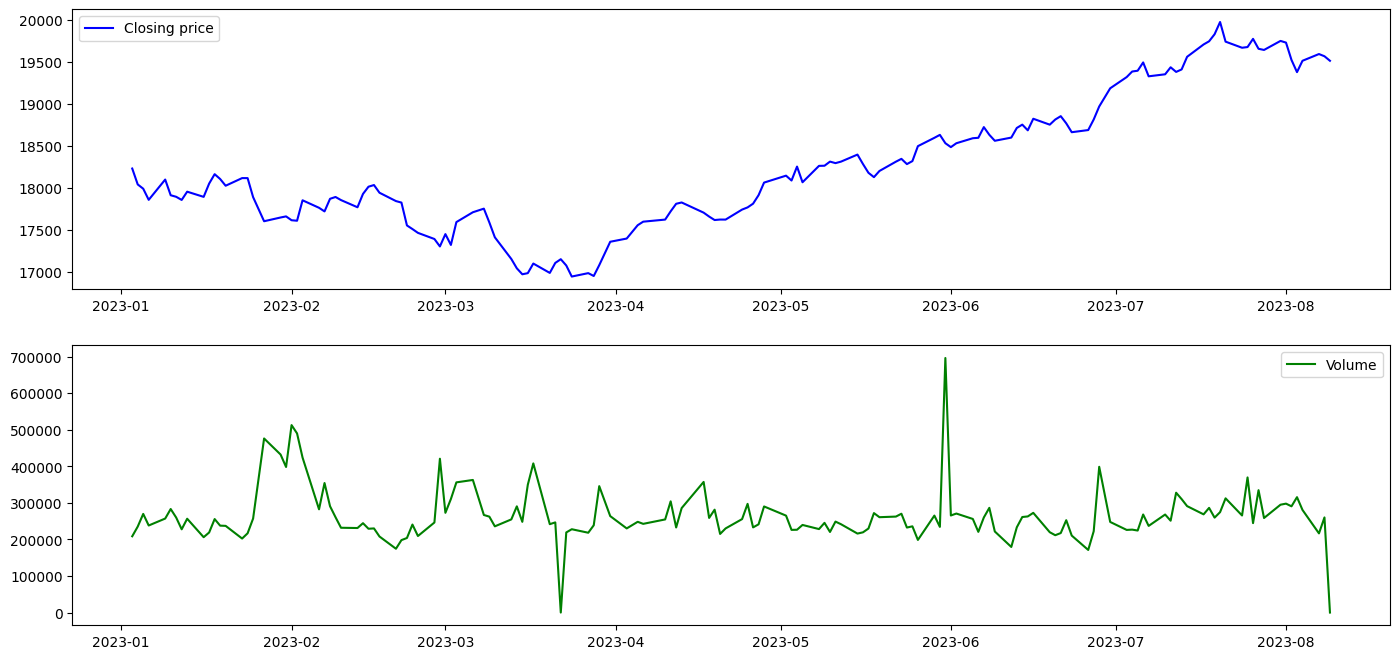

In [22]:
plt.figure(figsize=(17,8))

plt.title("Comparison of closing prices and Volume",size=21)

plt.subplot(2, 1, 1)
plt.plot(new_df.Close,color="blue",label="Closing price")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(new_df.Volume,color="green",label="Volume")

plt.legend()
plt.show()

In [23]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Scatter(x=new_df.index,y=new_df.Close,name="Close"), row=1, col=1)

fig.append_trace(go.Scatter(x=new_df.index,y=new_df.Volume,name="Volume"), row=2, col=1)

fig.show()


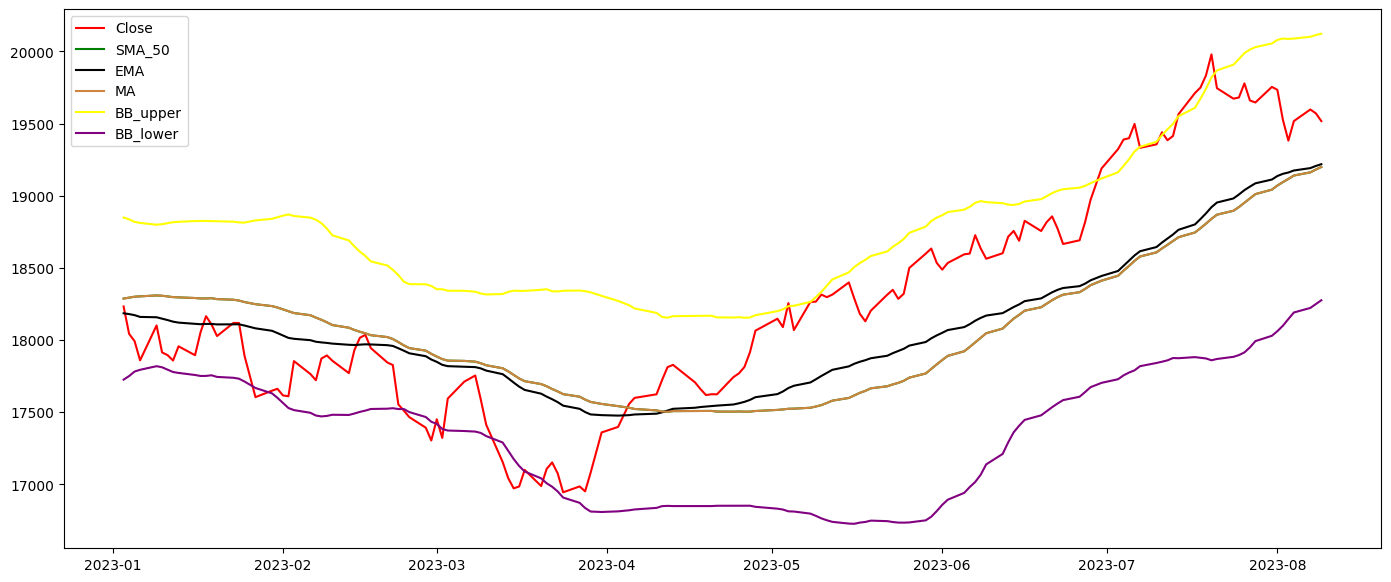

In [24]:
plt.figure(figsize=(17,7))
plt.plot(final_df.index,final_df.Close,label="Close",color="red")
plt.plot(final_df.index,final_df.SMA_50,label="SMA_50",color="green")
plt.plot(final_df.index,final_df.EMA,label="EMA",color="black")
plt.plot(final_df.index,final_df.MA,label="MA",color="peru")
plt.plot(final_df.index,final_df.BB_upper,label="BB_upper",color="yellow")
plt.plot(final_df.index,final_df.BB_lower,label="BB_lower",color="purple")
#plt.plot(final_df.index,final_df.OBV,label="OBV",color="blue")
plt.legend()
plt.show()

In [25]:
fig=px.line(final_df,x=final_df.index,y="Close")
#fig.add_scatter(x=final_df.index,y=final_df.MA)
fig.add_scatter(x=final_df.index,y=final_df.SMA_50,name="SMA_50")
fig.add_scatter(x=final_df.index,y=final_df.EMA,name="EMA")
fig.add_scatter(x=final_df.index,y=final_df.BB_upper,name="BB_upper")
fig.add_scatter(x=final_df.index,y=final_df.BB_lower,name="BB_lower")
fig.show()

In [26]:
fig=px.line(final_df,x=final_df.index,y="Close")
fig.add_scatter(x=final_df.index,y=final_df.SMA_100,name="SMA_100")
fig.add_scatter(x=final_df.index,y=final_df.SMA_50,name="SMA_50")

In [27]:
final_df.head()

,Close,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,SMA_100,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18232.550781,0.001929,0.007188,0.006733,173.827070,18287.258008,17893.608008,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18042.949219,-0.010399,0.007188,0.006812,174.250078,18293.501992,17898.690000,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327
2023-01-05 00:00:00+05:30,17992.150391,-0.002815,0.007188,0.006796,175.314102,18300.218008,17902.021504,18172.444119,53.474754,-74.458628,-48.429295,18300.218008,18818.731918,17781.704097,1156100,0.125938,18091.94327
2023-01-06 00:00:00+05:30,17859.449219,-0.007376,0.007188,0.006856,177.763086,18302.668008,17903.634492,18160.169809,51.254067,-92.084162,-57.160269,18302.668008,18811.383842,17793.952174,917900,0.109206,18091.94327
2023-01-09 00:00:00+05:30,18101.199219,0.013536,0.007188,0.007104,181.098086,18308.955977,17906.393984,18157.857237,53.096907,-85.559048,-62.840025,18308.955977,18799.078268,17818.833685,1175100,0.120478,18091.94327


## New_df Visualization

In [28]:
new_df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,...,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700,0.001929,0.007188,0.006733,173.827070,...,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200,-0.010399,0.007188,0.006812,174.250078,...,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327


C:\Users\adite\AppData\Local\Temp\ipykernel_6956\3965776242.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




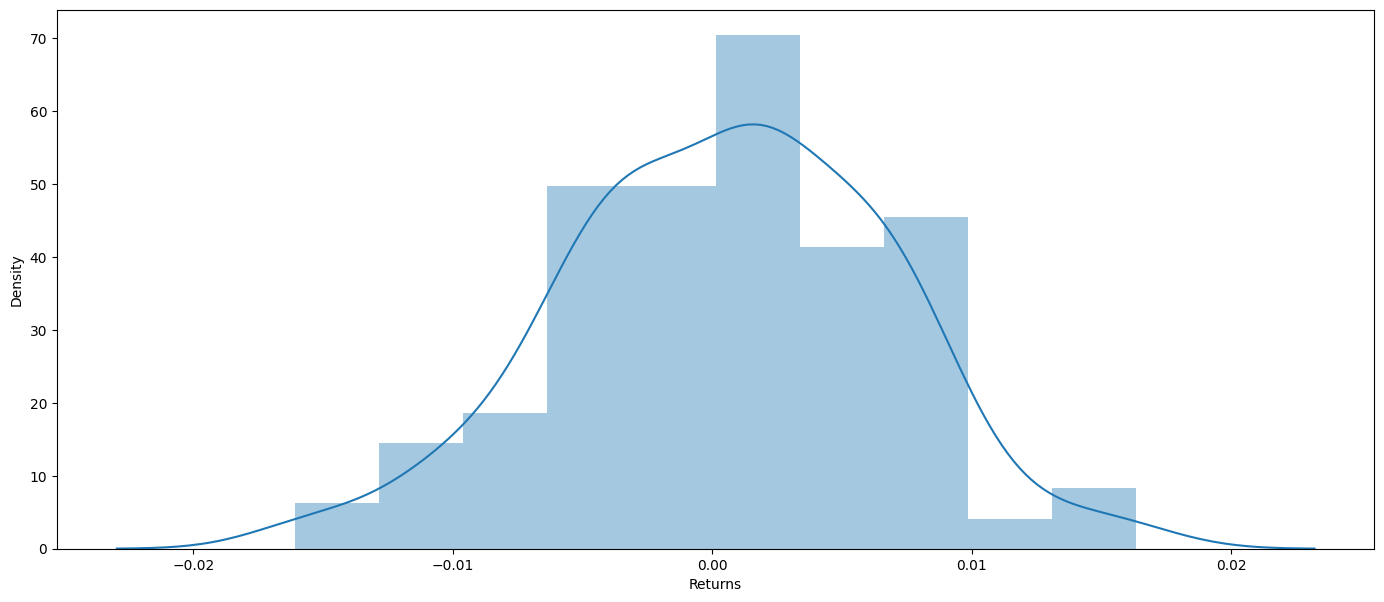

In [29]:
plt.figure(figsize=(17,7))
sns.distplot(new_df.Returns)
plt.show()

In [30]:
new_df.Returns.sum()

0.07289523387814589

Here we can say that, If we had invested money in NIFTY in last 5 years, we would have got 59% of return.

In [31]:
new_df.Returns.skew()

-0.1449380361952874

A negative skewness of -1.15 suggests that the distribution of your returns is highly skewed to the left, with a long tail of negative returns. This means that there are more extreme negative returns than positive returns in your investment portfolio, and there is a higher probability of experiencing losses than gains.

In [32]:
new_df.Std_Dev.sum()

1.0710330085487334

In [33]:
new_df.ATR.sum()

26023.8233203125

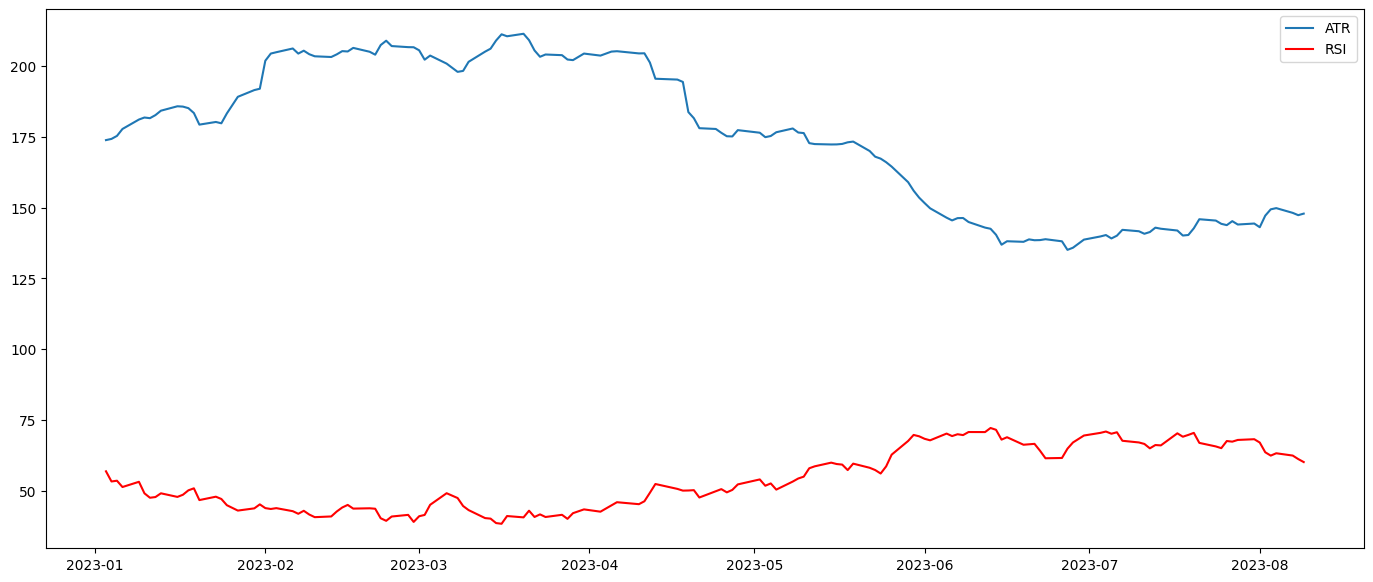

In [34]:
plt.figure(figsize=(17,7))
plt.plot(new_df.ATR,label="ATR")
plt.plot(new_df.RSI,label="RSI",color="red")
plt.legend()
plt.show()

In [35]:
fig=px.line(new_df,x=new_df.index,y="ATR")
fig.add_scatter(x=new_df.index,y=new_df.RSI,name="RSI")
fig.show()

In [36]:
fig=px.line(new_df,x=new_df.index,y="RSI")
fig.add_hline(y=35)
fig.add_hline(y=65)
fig.show()

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\1002754633.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




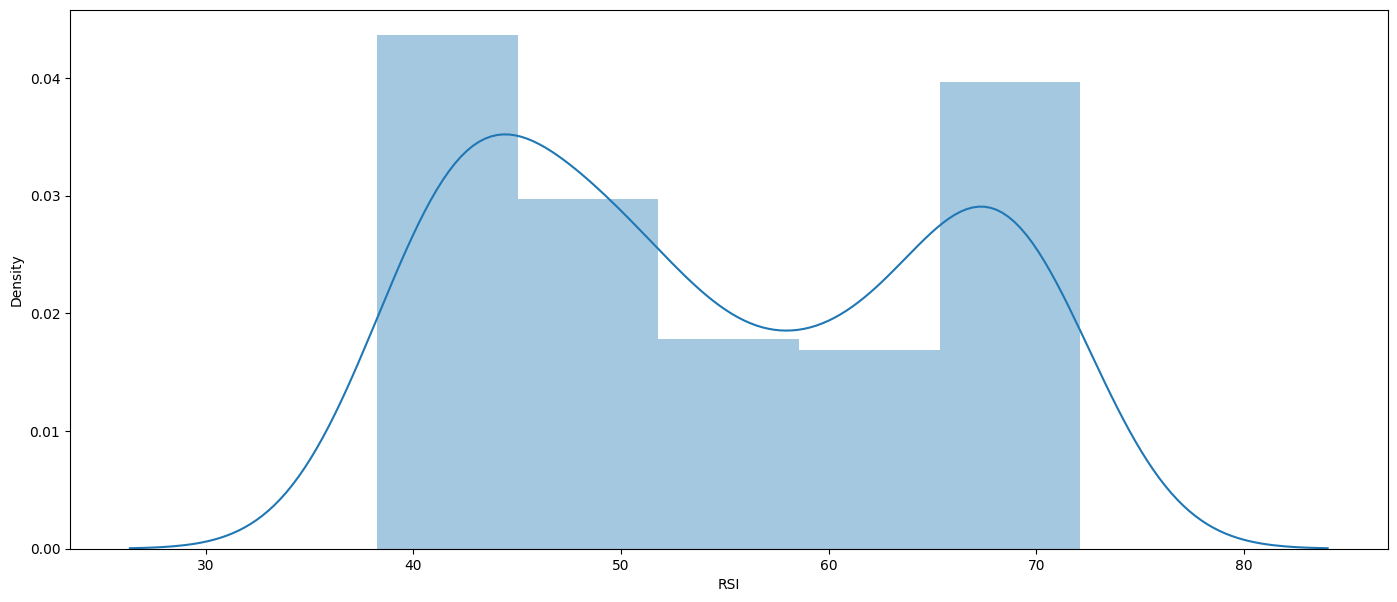

In [37]:
plt.figure(figsize=(17,7))
sns.distplot(new_df.RSI)
plt.show()

**A reading above 70 is generally considered overbought, while a reading below 30 is generally considered oversold. Traders may use RSI to identify potential buy or sell signals based on these conditions.**

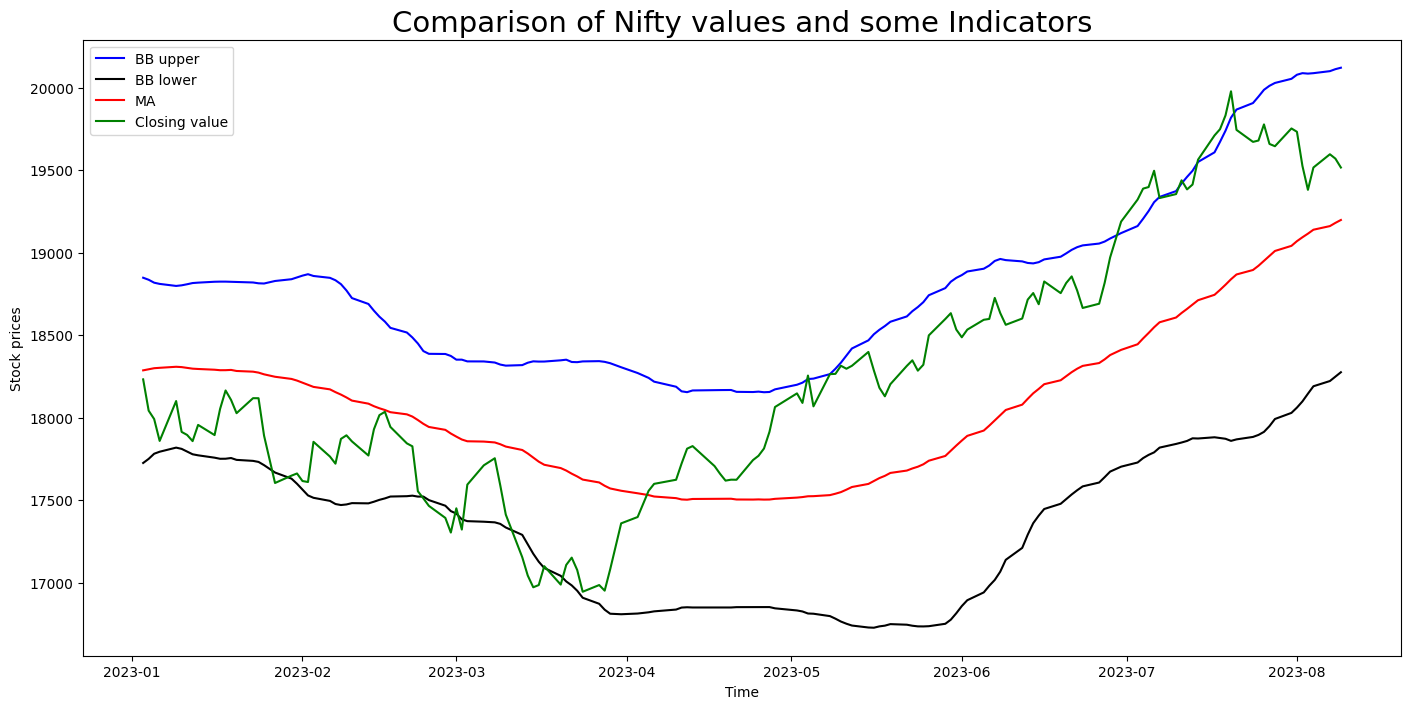

In [38]:
plt.figure(figsize=(17,8))
plt.plot(new_df.BB_upper,color="blue",label="BB upper")
plt.plot(new_df.BB_lower,color="Black",label="BB lower")
plt.plot(new_df.MA,color="red",label="MA")
plt.plot(new_df.Close,color="green",label="Closing value")
plt.ylabel("Stock prices")
plt.xlabel("Time")
plt.title("Comparison of Nifty values and some Indicators",size=21)
plt.legend()
plt.show()

In [39]:
fig=px.line(new_df,x=new_df.index,y="Close")
fig.add_scatter(x=new_df.index,y=new_df.MA,name="MA")
fig.add_scatter(x=new_df.index,y=new_df.BB_upper,name="BB_upper")
fig.add_scatter(x=new_df.index,y=new_df.BB_lower,name="BB_lower")
fig.show()

Traders use the upper and lower Bollinger Bands to identify potential support and resistance levels. When the               price of a security approaches or touches the upper Bollinger Band, it is considered overbought, and a potential                 sell signal may be generated. Conversely, when the price of a security approaches or touches the lower Bollinger                 Band, it is considered oversold, and a potential buy signal may be generated.

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\3299194764.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



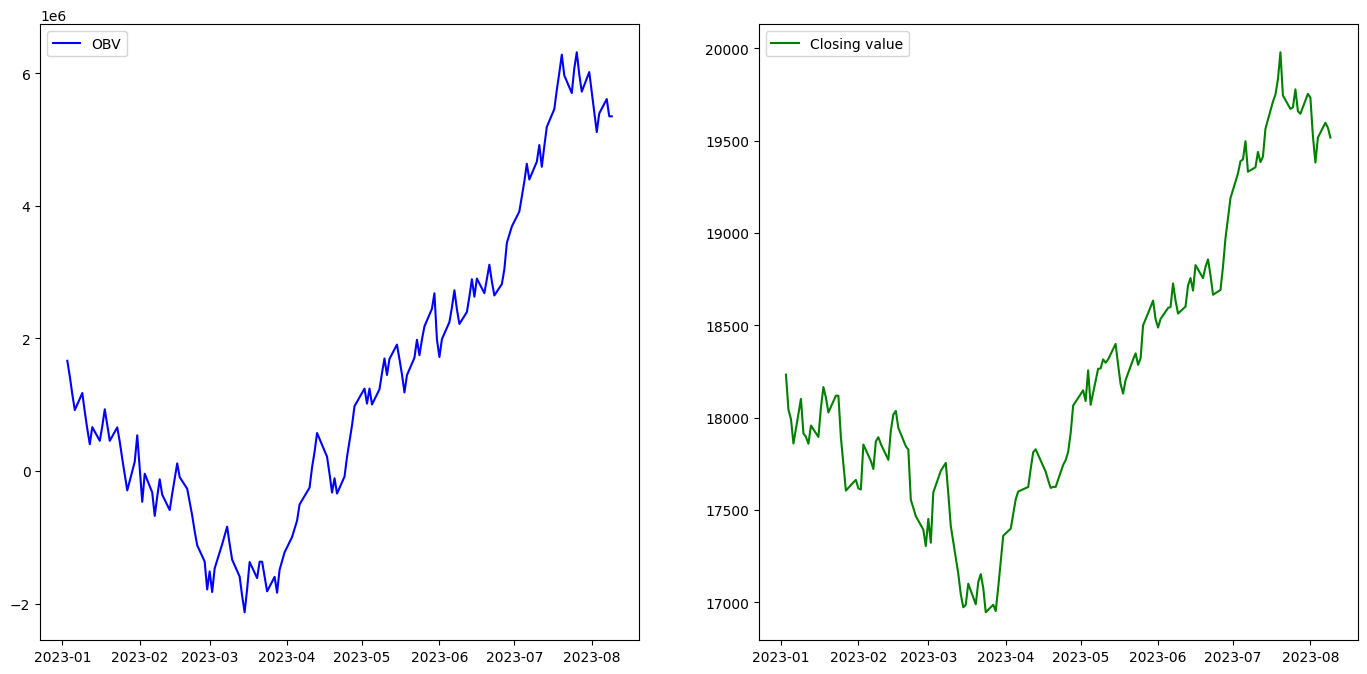

In [40]:
plt.figure(figsize=(17,8))

plt.title("Comparison of closing prices and OBV",size=21)

plt.subplot(1, 2, 1)
plt.plot(new_df.OBV,color="blue",label="OBV")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(new_df.Close,color="green",label="Closing value")

plt.legend()
plt.show()

If the OBV line is trending upward and the asset price is also trending upward, this is considered a bullish trend. Conversely, if the OBV line is trending downward and the asset price is also trending downward, this is considered a bearish trend.

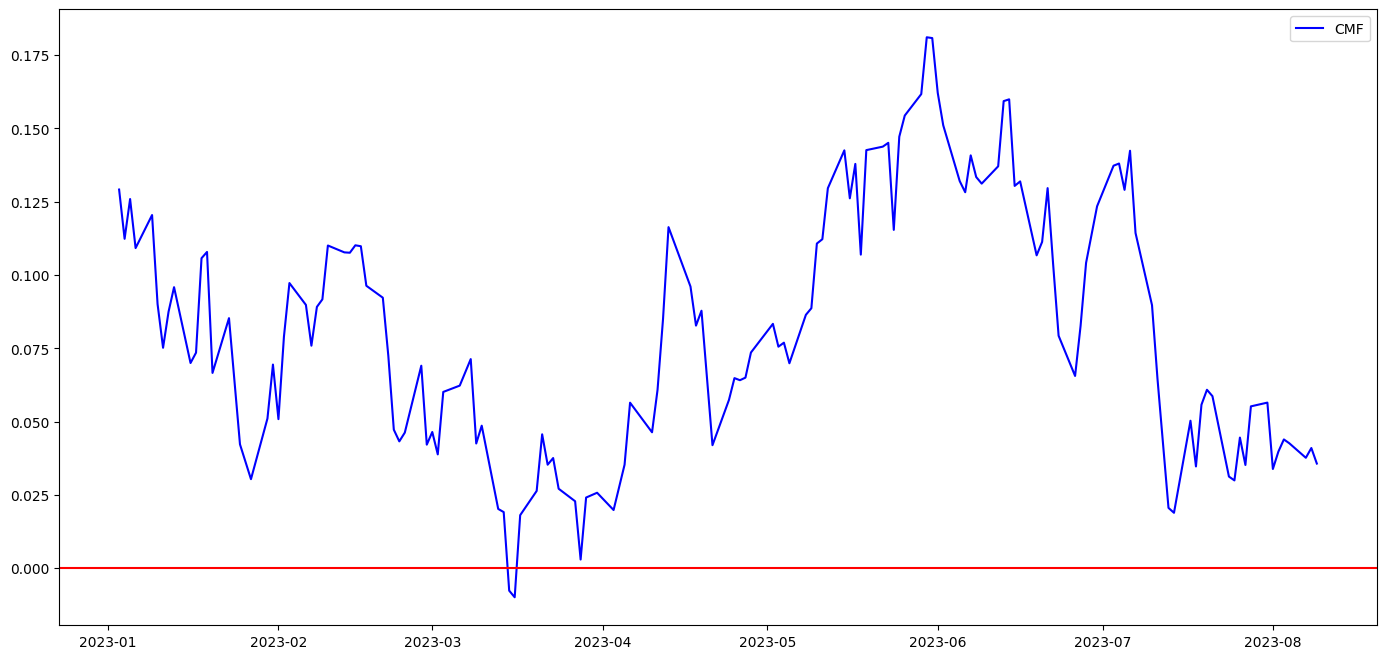

In [41]:
plt.figure(figsize=(17,8))
plt.plot(new_df.CMF,color="blue",label="CMF")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()

In [42]:
fig=px.line(new_df,x=new_df.index,y="CMF")
fig.add_hline(y=0)
fig.show()

If the CMF line is above the zero line, this indicates that buying pressure is greater than selling pressure, which may indicate a potential bullish trend. Conversely, if the CMF line is below the zero line, this indicates that selling pressure is greater than buying pressure, which may indicate a potential bearish trend.

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\3539943152.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



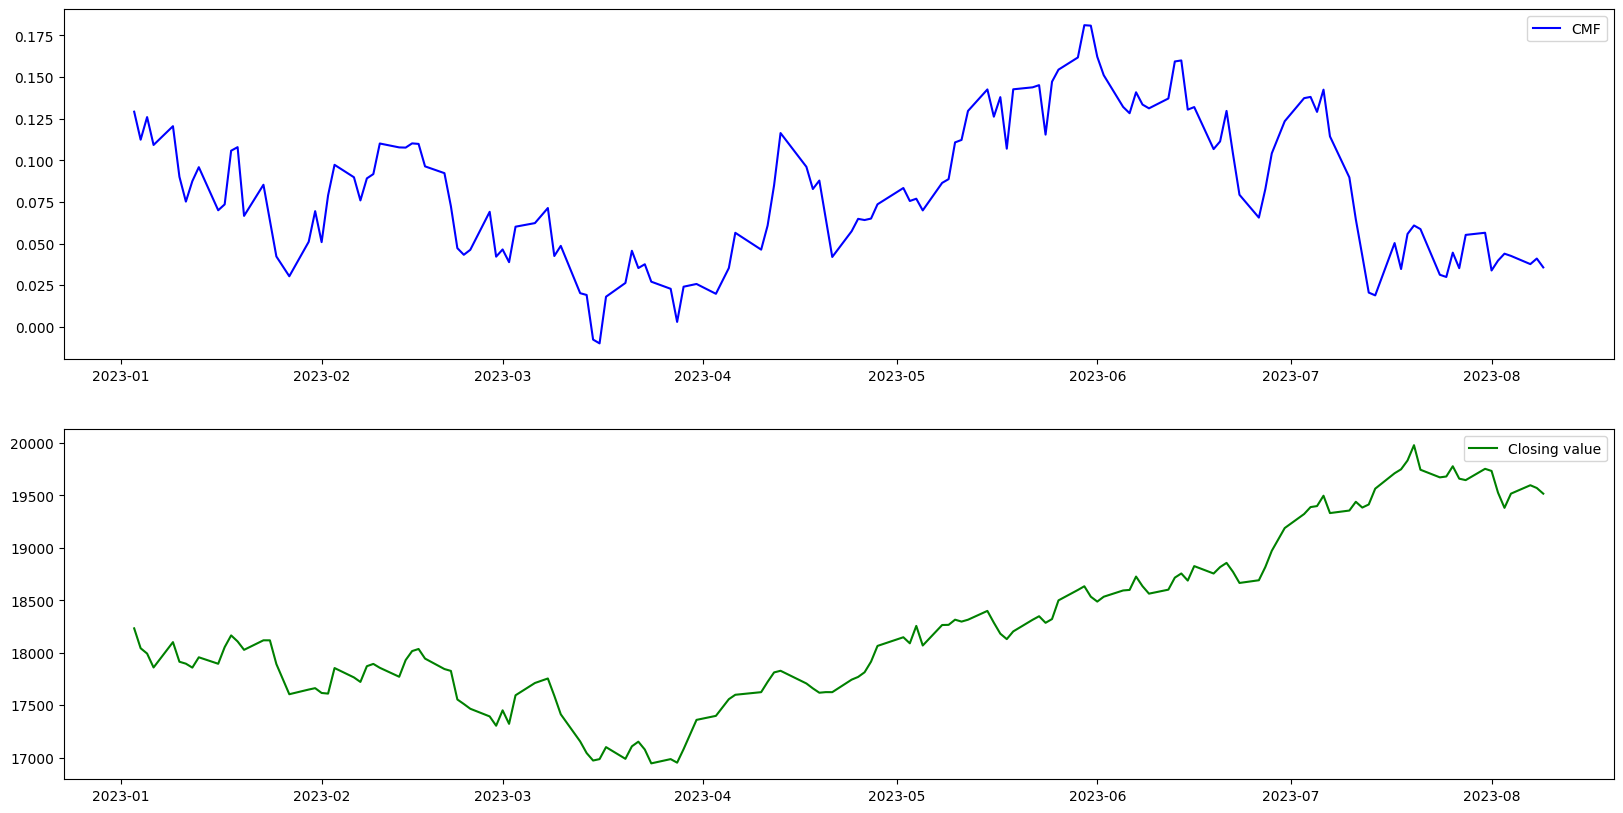

In [43]:
plt.figure(figsize=(20,10))

plt.title("Comparison of closing prices and CMF",size=21)

plt.subplot(2, 1, 1)
plt.plot(new_df.CMF,color="blue",label="CMF")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(new_df.Close,color="green",label="Closing value")

plt.legend()
plt.show()

CMF can also be used to confirm trends in an asset. If the CMF line is trending upward and the asset price is also trending upward, this is considered a bullish trend. Conversely, if the CMF line is trending downward and the asset price is also trending downward, this is considered a bearish trend.

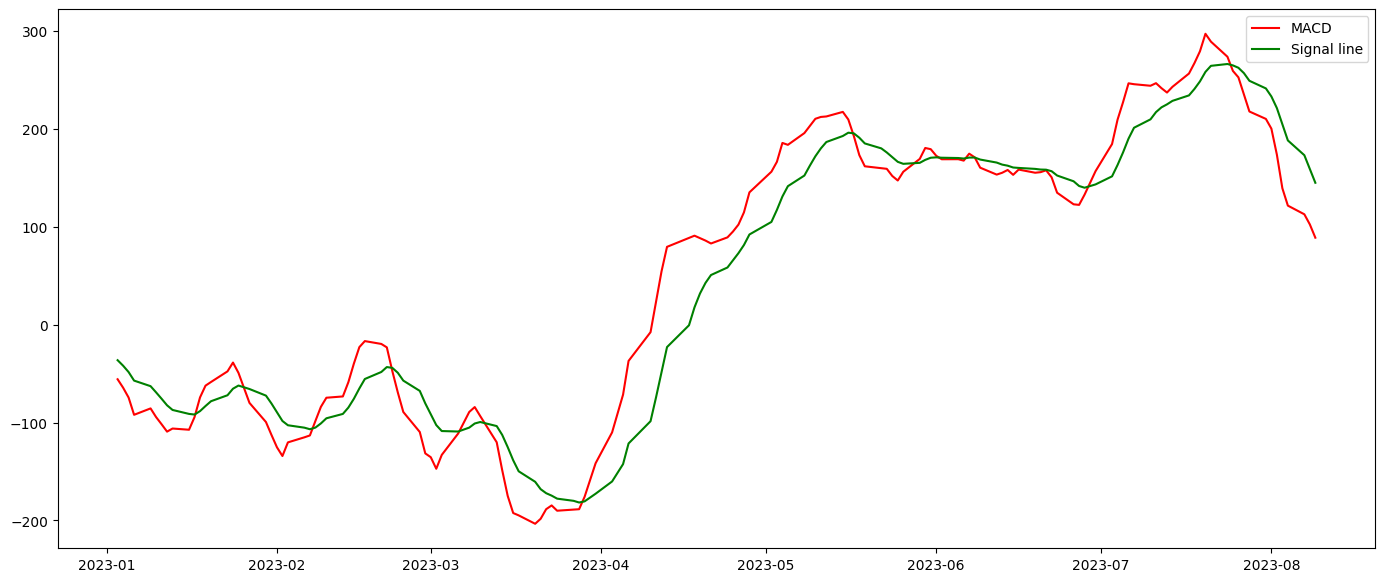

In [44]:
plt.figure(figsize=(17,7))
plt.plot(new_df.MACD,color="red",label="MACD")
plt.plot(new_df.Signal_Line,color="green",label="Signal line")
plt.legend()
plt.show()

In [45]:
fig=px.line(new_df,x=new_df.index,y="MACD")
fig.add_scatter(x=new_df.index,y=new_df.Signal_Line,name="Signal line")
fig.show()

When the MACD line crosses above the signal line, this is known as a bullish crossover and may indicate a potential buy signal. Conversely, when the MACD line crosses below the signal line, this is known as a bearish crossover and may indicate a potential sell signal.

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\2659191231.py:5: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



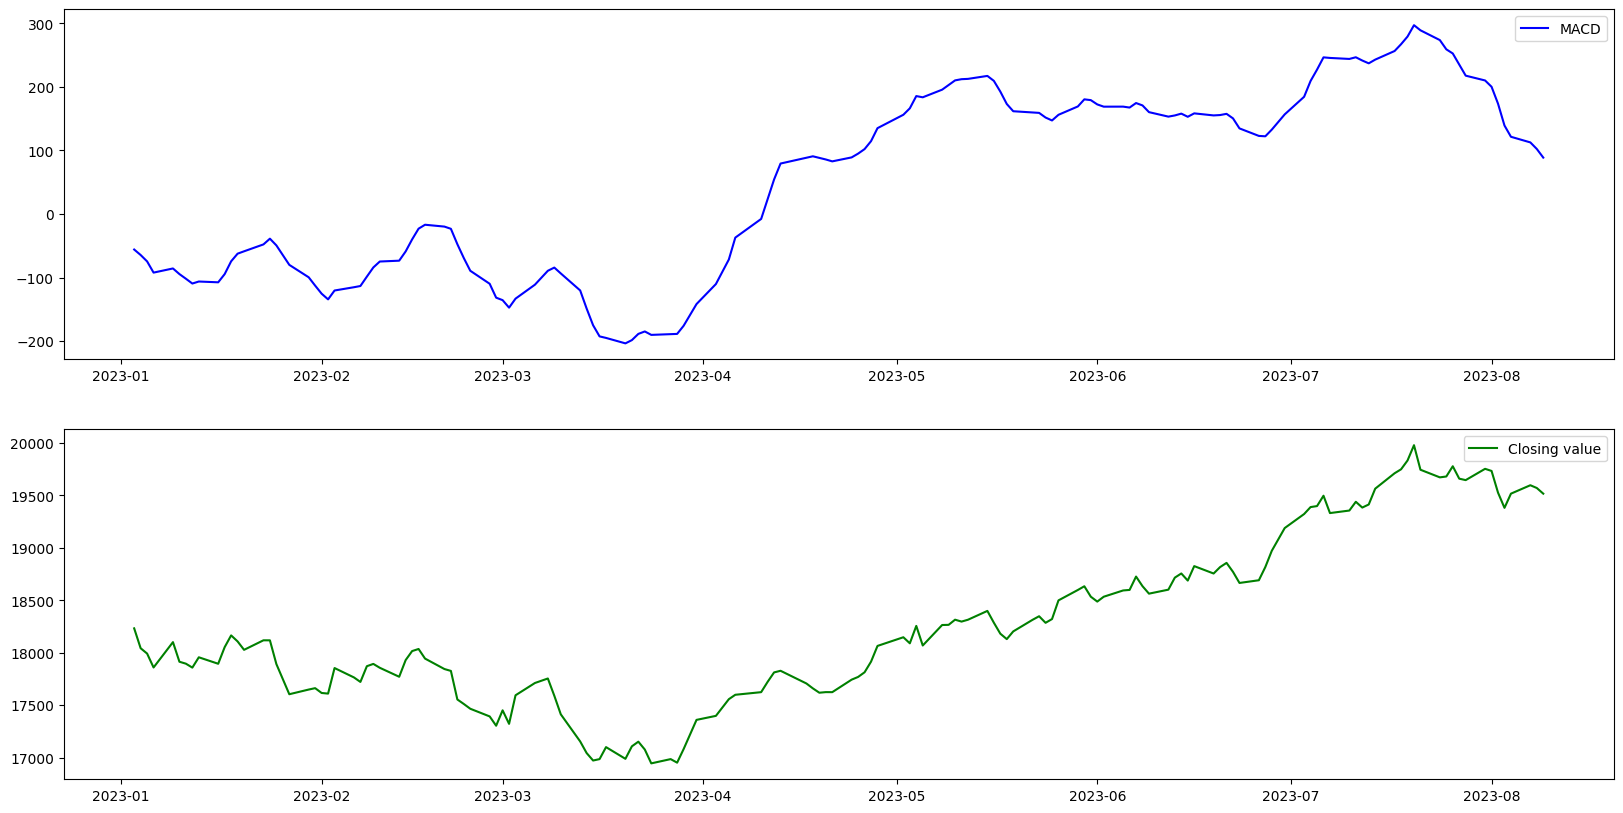

In [46]:
plt.figure(figsize=(20,10))

plt.title("Comparison of closing prices and MACD",size=21)

plt.subplot(2, 1, 1)
plt.plot(new_df.MACD,color="blue",label="MACD")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(new_df.Close,color="green",label="Closing value")

plt.legend()
plt.show()

If the asset's price is trending upward but the MACD line is trending downward, this is known as a bearish divergence and may indicate a potential trend reversal. Conversely, if the asset's price is trending downward but the MACD line is trending upward, this is known as a bullish divergence and may indicate a potential trend reversal.

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\1887314583.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




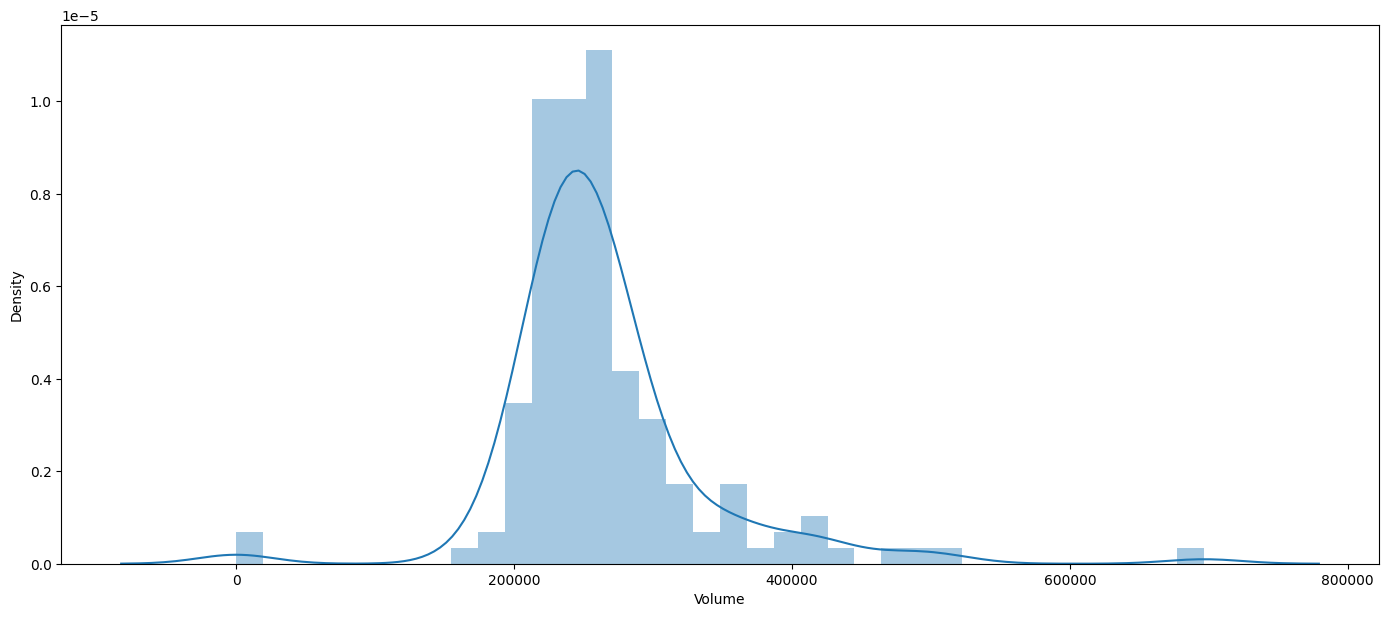

In [47]:
plt.figure(figsize=(17,7))
sns.distplot(new_df.Volume)
plt.show()

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\1845379544.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




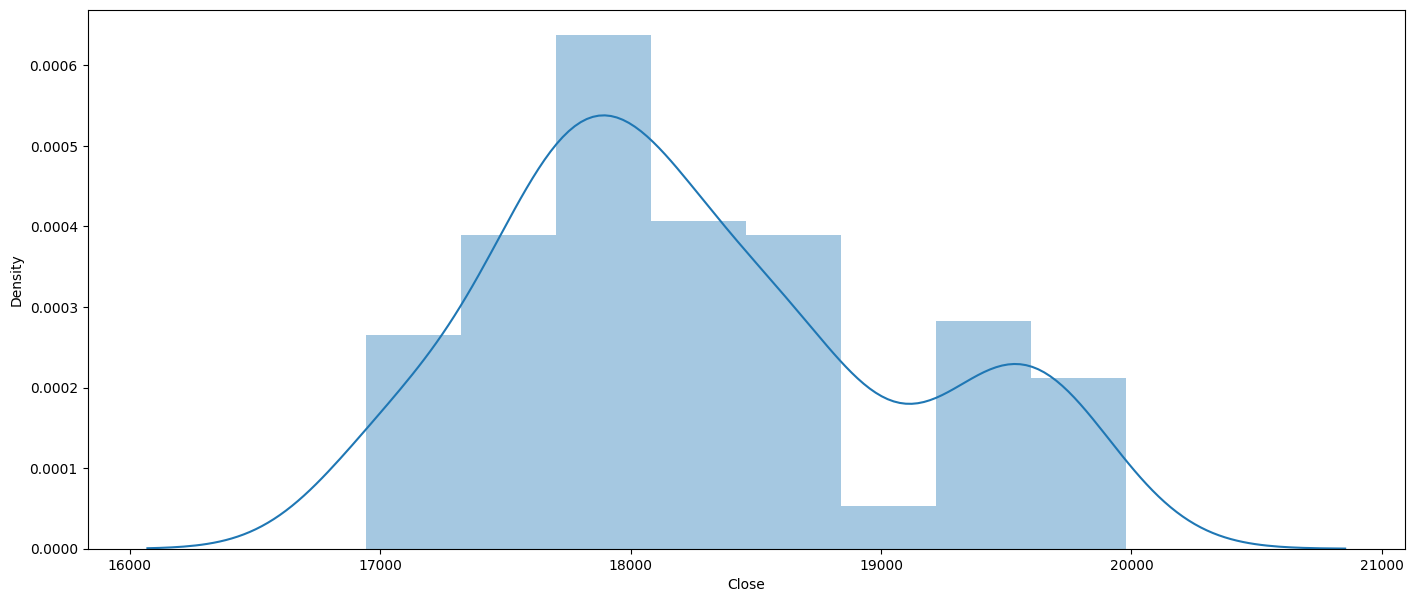

In [48]:
plt.figure(figsize=(17,7))
sns.distplot(new_df.Close)
plt.show()

In [49]:
new_df.drop(["Adj Close"],axis=1,inplace=True)
new_df.head(2)

C:\Users\adite\AppData\Local\Temp\ipykernel_6956\616140417.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,...,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,208700,0.001929,0.007188,0.006733,173.827070,18287.258008,...,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,235200,-0.010399,0.007188,0.006812,174.250078,18293.501992,...,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327


# Data Splitting

In [50]:
new_df.head(2)

,Open,High,Low,Close,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,...,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,18232.550781,208700,0.001929,0.007188,0.006733,173.827070,18287.258008,...,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,18042.949219,235200,-0.010399,0.007188,0.006812,174.250078,18293.501992,...,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327


In [51]:
X=new_df.drop(["Close"],axis=1)
X.head()

,Open,High,Low,Volume,Returns,Std_Dev,Rolling_Std_Dev,ATR,SMA_50,SMA_100,EMA,RSI,MACD,Signal_Line,MA,BB_upper,BB_lower,OBV,CMF,VWAP
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+05:30,18163.199219,18251.949219,18149.800781,208700,0.001929,0.007188,0.006733,173.827070,18287.258008,17893.608008,18185.388917,56.806927,-55.775325,-36.304854,18287.258008,18848.805697,17725.710319,1661200,0.129175,18091.94327
2023-01-04 00:00:00+05:30,18230.650391,18243.000000,18020.599609,235200,-0.010399,0.007188,0.006812,174.250078,18293.501992,17898.690000,18179.803047,53.214830,-64.390395,-41.921962,18293.501992,18836.426792,17750.577193,1426000,0.112373,18091.94327
2023-01-05 00:00:00+05:30,18101.949219,18120.300781,17892.599609,269900,-0.002815,0.007188,0.006796,175.314102,18300.218008,17902.021504,18172.444119,53.474754,-74.458628,-48.429295,18300.218008,18818.731918,17781.704097,1156100,0.125938,18091.94327
2023-01-06 00:00:00+05:30,18008.050781,18047.400391,17795.550781,238200,-0.007376,0.007188,0.006856,177.763086,18302.668008,17903.634492,18160.169809,51.254067,-92.084162,-57.160269,18302.668008,18811.383842,17793.952174,917900,0.109206,18091.94327
2023-01-09 00:00:00+05:30,17952.550781,18141.400391,17936.150391,257200,0.013536,0.007188,0.007104,181.098086,18308.955977,17906.393984,18157.857237,53.096907,-85.559048,-62.840025,18308.955977,18799.078268,17818.833685,1175100,0.120478,18091.94327


In [52]:
y=new_df[["Close"]]
y.head()

,Close
Date,
2023-01-03 00:00:00+05:30,18232.550781
2023-01-04 00:00:00+05:30,18042.949219
2023-01-05 00:00:00+05:30,17992.150391
2023-01-06 00:00:00+05:30,17859.449219
2023-01-09 00:00:00+05:30,18101.199219


In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119, 20), (30, 20), (119, 1), (30, 1))

# Standardization of the data

In [55]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(new_df)
scaled_data

array([[-0.14530008, -0.11007634, -0.0375232 , ...,  0.09813601,
         1.13107223,  0.        ],
       [-0.05913748, -0.12155663, -0.19986443, ..., -0.00368559,
         0.73341813,  0.        ],
       [-0.22354127, -0.27895839, -0.36069638, ..., -0.12052934,
         1.05446916,  0.        ],
       ...,
       [ 1.66050694,  1.64547116,  1.69016379, ...,  1.80758738,
        -1.03452294,  0.        ],
       [ 1.72482388,  1.66336809,  1.70059126, ...,  1.69489961,
        -0.9555431 ,  0.        ],
       [ 1.66299938,  1.59589194,  1.61816538, ...,  1.69489961,
        -1.081103  ,  0.        ]])

In [56]:
scaled_X=scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y)

In [57]:
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_X,scaled_y,test_size=0.2,shuffle=False)

In [58]:
scaled_x_train.shape,scaled_x_test.shape,scaled_y_train.shape,scaled_y_test.shape

((119, 20), (30, 20), (119, 1), (30, 1))

In [59]:
y_train

,Close
Date,
2023-01-03 00:00:00+05:30,18232.550781
2023-01-04 00:00:00+05:30,18042.949219
2023-01-05 00:00:00+05:30,17992.150391
2023-01-06 00:00:00+05:30,17859.449219
2023-01-09 00:00:00+05:30,18101.199219
...,...
2023-06-21 00:00:00+05:30,18856.849609
2023-06-22 00:00:00+05:30,18771.250000
2023-06-23 00:00:00+05:30,18665.500000


# Model Building

## 1. Random Forest

In [60]:
rf_model=RandomForestRegressor()
rf_model.fit(scaled_x_train,scaled_y_train)

c:\Users\adite\Rira Software\Development\ICICImarkets\venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [61]:
scaled_y_train_pred = rf_model.predict(scaled_x_train)
scaled_y_train_pred

array([-0.04913999, -0.21397202, -0.31555531, -0.48127749, -0.24063235,
       -0.39431835, -0.46205932, -0.49450674, -0.41700077, -0.43572522,
       -0.27343353, -0.16830668, -0.18791594, -0.28059422, -0.18217077,
       -0.17909147, -0.45748398, -0.80509895, -0.79494503, -0.76464896,
       -0.84485598, -0.81141772, -0.61620474, -0.62009252, -0.6824379 ,
       -0.4971575 , -0.47789757, -0.50356867, -0.58636826, -0.43617586,
       -0.35561943, -0.27827493, -0.36231863, -0.50987394, -0.52331594,
       -0.87434918, -0.93100565, -0.97407701, -1.12355548, -1.18787703,
       -1.06687644, -1.18728007, -0.86218013, -0.69103095, -0.69725014,
       -0.83019917, -1.09376832, -1.30840386, -1.51871375, -1.60235747,
       -1.61506214, -1.49367756, -1.60675196, -1.47524065, -1.42646678,
       -1.48998971, -1.63587251, -1.5971364 , -1.644023  , -1.51575656,
       -1.19769708, -1.10987842, -0.92732398, -0.84253035, -0.77767014,
       -0.69348193, -0.57905329, -0.57098064, -0.70820108, -0.72

In [62]:
scaled_y_train_pred_df=pd.DataFrame(scaled_y_train_pred,columns=["scaled_y_train_pred"])
scaled_y_train_pred_df

,scaled_y_train_pred
0,-0.049140
1,-0.213972
2,-0.315555
3,-0.481277
4,-0.240632
...,...
114,0.730940
115,0.642780
116,0.534645
117,0.558625


In [63]:
y_train_pred=scaler.inverse_transform(scaled_y_train_pred_df)
y_train_pred

array([[18222.36802734],
       [18092.13259766],
       [18011.870625  ],
       [17880.931875  ],
       [18071.06800781],
       [17949.63916016],
       [17896.11634766],
       [17870.47931641],
       [17931.71755859],
       [17916.92318359],
       [18045.15146484],
       [18128.21324219],
       [18112.71976562],
       [18039.49373047],
       [18117.25908203],
       [18119.69207031],
       [17899.73136719],
       [17625.07730469],
       [17633.10001953],
       [17657.03724609],
       [17593.66488281],
       [17620.08478516],
       [17774.32451172],
       [17771.25273438],
       [17721.99302734],
       [17868.38492188],
       [17883.60238281],
       [17863.31939453],
       [17797.89861328],
       [17916.56712891],
       [17980.21556641],
       [18041.32623047],
       [17974.92246094],
       [17858.33753906],
       [17847.716875  ],
       [17570.36201172],
       [17525.59716797],
       [17491.56605469],
       [17373.46162109],
       [17322.64052734],


In [64]:
y_train_pred_df=pd.DataFrame(y_train_pred,columns=["y_train_pred"])
y_train_pred_df=y_train_pred_df.set_index(y_train.index)
y_train_pred_df

,y_train_pred
Date,
2023-01-03 00:00:00+05:30,18222.368027
2023-01-04 00:00:00+05:30,18092.132598
2023-01-05 00:00:00+05:30,18011.870625
2023-01-06 00:00:00+05:30,17880.931875
2023-01-09 00:00:00+05:30,18071.068008
...,...
2023-06-21 00:00:00+05:30,18838.717148
2023-06-22 00:00:00+05:30,18769.060840
2023-06-23 00:00:00+05:30,18683.622305


In [65]:
rf_train_df=pd.DataFrame({"Actual":y_train.Close,"Predicted":y_train_pred_df.y_train_pred})
rf_train_df

,Actual,Predicted
Date,,
2023-01-03 00:00:00+05:30,18232.550781,18222.368027
2023-01-04 00:00:00+05:30,18042.949219,18092.132598
2023-01-05 00:00:00+05:30,17992.150391,18011.870625
2023-01-06 00:00:00+05:30,17859.449219,17880.931875
2023-01-09 00:00:00+05:30,18101.199219,18071.068008
...,...,...
2023-06-21 00:00:00+05:30,18856.849609,18838.717148
2023-06-22 00:00:00+05:30,18771.250000,18769.060840
2023-06-23 00:00:00+05:30,18665.500000,18683.622305


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


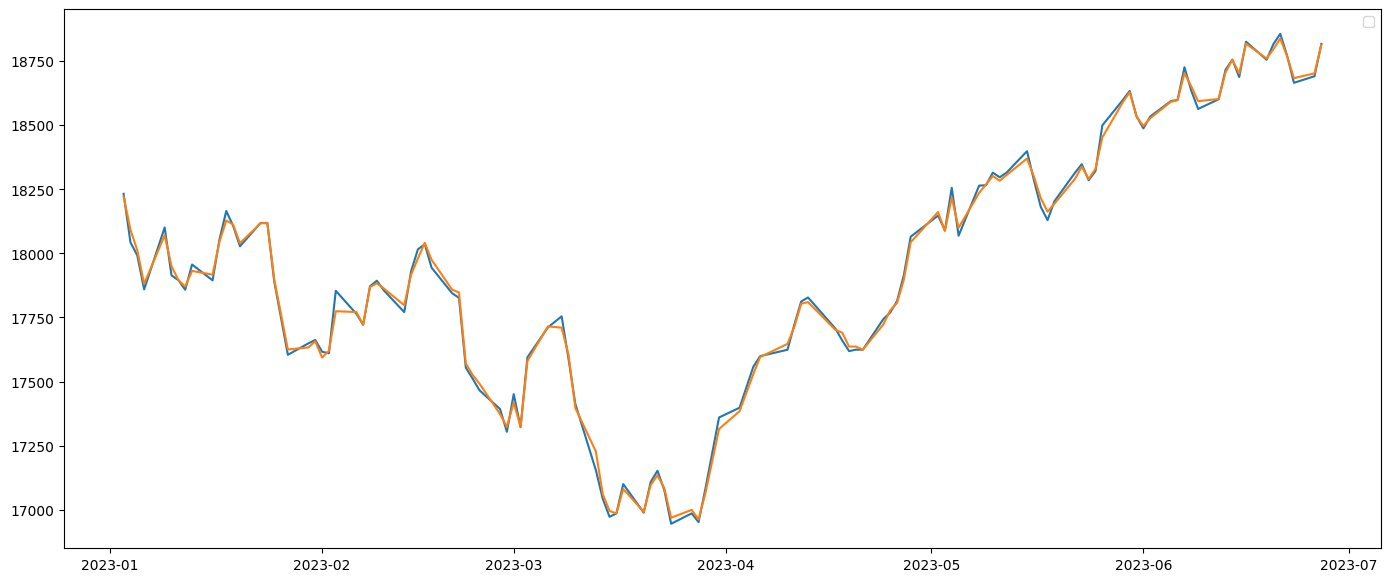

In [66]:
plt.figure(figsize=(17,7))
plt.plot(rf_train_df)
plt.legend()
plt.show()

In [67]:
fig=px.line(rf_train_df,x=rf_train_df.index,y=["Actual","Predicted"])
fig.show()

In [68]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
train_rf_r2= r2_score(rf_train_df.Actual, rf_train_df.Predicted)
train_rf_r2

0.9981841932095867

In [70]:
train_rf_rmse=rmse(rf_train_df.Actual, rf_train_df.Predicted)
train_rf_rmse

21.37396272799758

In [71]:
train_rf_mape=mape(rf_train_df.Actual, rf_train_df.Predicted)
train_rf_mape

0.09202051978907877

## Random forest Model Testing

In [72]:
scaled_y_test_pred = rf_model.predict(scaled_x_test)

In [73]:
scaled_y_test_pred_df=pd.DataFrame(scaled_y_test_pred,columns=["scaled_y_test_pred"])
y_test_pred=scaler.inverse_transform(scaled_y_test_pred_df)

y_test_pred_df=pd.DataFrame(y_test_pred,columns=["y_test_pred"])
y_test_pred_df=y_test_pred_df.set_index(y_test.index)
y_test_pred_df

,y_test_pred
Date,
2023-06-28 00:00:00+05:30,18824.093887
2023-06-30 00:00:00+05:30,18820.231816
2023-07-03 00:00:00+05:30,18820.978281
2023-07-04 00:00:00+05:30,18820.007754
2023-07-05 00:00:00+05:30,18815.516270
2023-07-06 00:00:00+05:30,18814.547813
2023-07-07 00:00:00+05:30,18809.651270
2023-07-10 00:00:00+05:30,18813.361309
2023-07-11 00:00:00+05:30,18813.952285


In [74]:
rf_test_df=pd.DataFrame({"Actual":y_test.Close,"Predicted":y_test_pred_df.y_test_pred})
rf_test_df

,Actual,Predicted
Date,,
2023-06-28 00:00:00+05:30,18972.099609,18824.093887
2023-06-30 00:00:00+05:30,19189.050781,18820.231816
2023-07-03 00:00:00+05:30,19322.550781,18820.978281
2023-07-04 00:00:00+05:30,19389.000000,18820.007754
2023-07-05 00:00:00+05:30,19398.500000,18815.516270
2023-07-06 00:00:00+05:30,19497.300781,18814.547813
2023-07-07 00:00:00+05:30,19331.800781,18809.651270
2023-07-10 00:00:00+05:30,19355.900391,18813.361309
2023-07-11 00:00:00+05:30,19439.400391,18813.952285


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


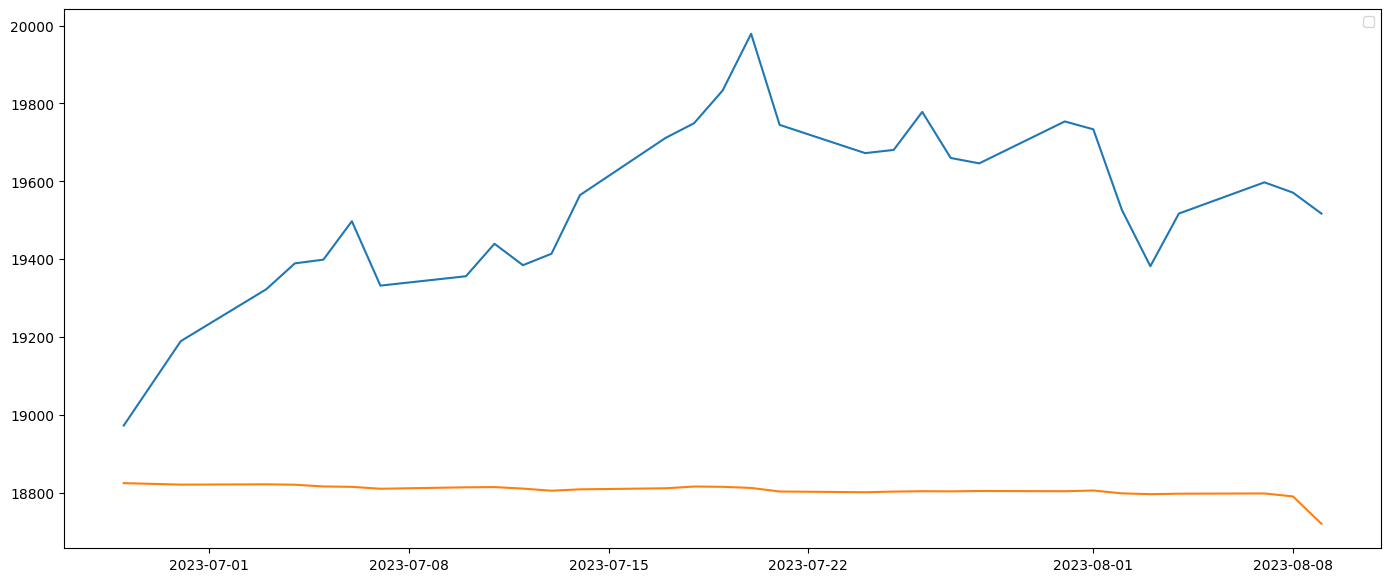

In [75]:
plt.figure(figsize=(17,7))
plt.plot(rf_test_df)
plt.legend()
plt.show()

In [76]:
fig=px.line(rf_test_df,x=rf_test_df.index,y=["Actual","Predicted"])
fig.show()

In [77]:
test_rf_r2 = r2_score(rf_test_df.Actual, rf_test_df.Predicted)
test_rf_r2

-12.699927107316123

In [78]:
test_rf_rmse=rmse(rf_test_df.Actual, rf_test_df.Predicted)
test_rf_rmse

768.345346651614

In [79]:
test_rf_mape=mape(rf_test_df.Actual, rf_test_df.Predicted)
test_rf_mape

3.768740591098211

## Support Vector machine

In [80]:
svm_model=SVR(kernel='linear')
svm_model.fit(scaled_X,scaled_y)

c:\Users\adite\Rira Software\Development\ICICImarkets\venv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(kernel='linear')

In [81]:
scaled_y_train_pred_svm = svm_model.predict(scaled_x_train)
scaled_y_train_pred_svm_df=pd.DataFrame(scaled_y_train_pred_svm,columns=["scaled_y_train_pred_svm"])
y_train_pred_svm=scaler.inverse_transform(scaled_y_train_pred_svm_df)
y_train_pred_svm_df=pd.DataFrame(y_train_pred_svm,columns=["y_train_pred_svm"])
y_train_pred_svm_df=y_train_pred_svm_df.set_index(y_train.index)

In [82]:
train_svm_df=pd.DataFrame({"Actual":y_train.Close,"Predicted":y_train_pred_svm_df.y_train_pred_svm})
train_svm_df

,Actual,Predicted
Date,,
2023-01-03 00:00:00+05:30,18232.550781,18213.376696
2023-01-04 00:00:00+05:30,18042.949219,18042.920546
2023-01-05 00:00:00+05:30,17992.150391,18043.140082
2023-01-06 00:00:00+05:30,17859.449219,17904.527538
2023-01-09 00:00:00+05:30,18101.199219,18161.544999
...,...,...
2023-06-21 00:00:00+05:30,18856.849609,18881.409929
2023-06-22 00:00:00+05:30,18771.250000,18773.972571
2023-06-23 00:00:00+05:30,18665.500000,18651.350988


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


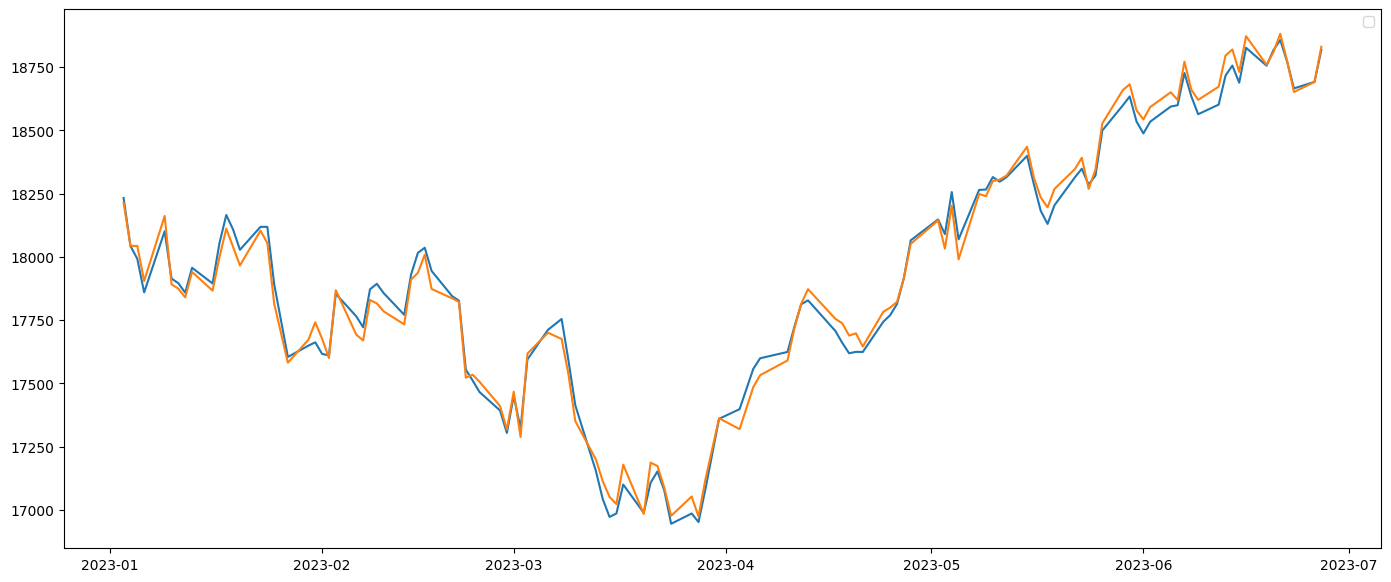

In [83]:
plt.figure(figsize=(17,7))
plt.plot(train_svm_df)
plt.legend()
plt.show()

In [84]:
fig=px.line(train_svm_df,x=train_svm_df.index,y=["Actual","Predicted"])
fig.show()

In [85]:
svm_train_r2= r2_score(train_svm_df.Actual, train_svm_df.Predicted)
svm_train_r2

0.9915713966201625

In [86]:
train_svm_mape=mape(train_svm_df.Actual, train_svm_df.Predicted)
train_svm_mape

0.21733979808193096

In [87]:
train_svm_rmse=rmse(train_svm_df.Actual, train_svm_df.Predicted)
train_svm_rmse

46.04983079636442

## SVM model testing

In [88]:
scaled_y_test_pred_svm = svm_model.predict(scaled_x_test)

scaled_y_test_pred_svm_df=pd.DataFrame(scaled_y_test_pred_svm,columns=["scaled_y_test_pred_svm"])
y_test_pred_svm=scaler.inverse_transform(scaled_y_test_pred_svm_df)

y_test_pred_svm_df=pd.DataFrame(y_test_pred_svm,columns=["y_test_pred_svm"])
y_test_pred_svm_df=y_test_pred_svm_df.set_index(y_test.index)
y_test_pred_svm_df

,y_test_pred_svm
Date,
2023-06-28 00:00:00+05:30,18998.730596
2023-06-30 00:00:00+05:30,19177.626334
2023-07-03 00:00:00+05:30,19287.719194
2023-07-04 00:00:00+05:30,19355.663702
2023-07-05 00:00:00+05:30,19362.137893
2023-07-06 00:00:00+05:30,19481.756614
2023-07-07 00:00:00+05:30,19311.758005
2023-07-10 00:00:00+05:30,19386.837383
2023-07-11 00:00:00+05:30,19448.714044


In [89]:
test_svm_df=pd.DataFrame({"Actual":y_test.Close,"Predicted":y_test_pred_svm_df.y_test_pred_svm})
test_svm_df

,Actual,Predicted
Date,,
2023-06-28 00:00:00+05:30,18972.099609,18998.730596
2023-06-30 00:00:00+05:30,19189.050781,19177.626334
2023-07-03 00:00:00+05:30,19322.550781,19287.719194
2023-07-04 00:00:00+05:30,19389.000000,19355.663702
2023-07-05 00:00:00+05:30,19398.500000,19362.137893
2023-07-06 00:00:00+05:30,19497.300781,19481.756614
2023-07-07 00:00:00+05:30,19331.800781,19311.758005
2023-07-10 00:00:00+05:30,19355.900391,19386.837383
2023-07-11 00:00:00+05:30,19439.400391,19448.714044


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


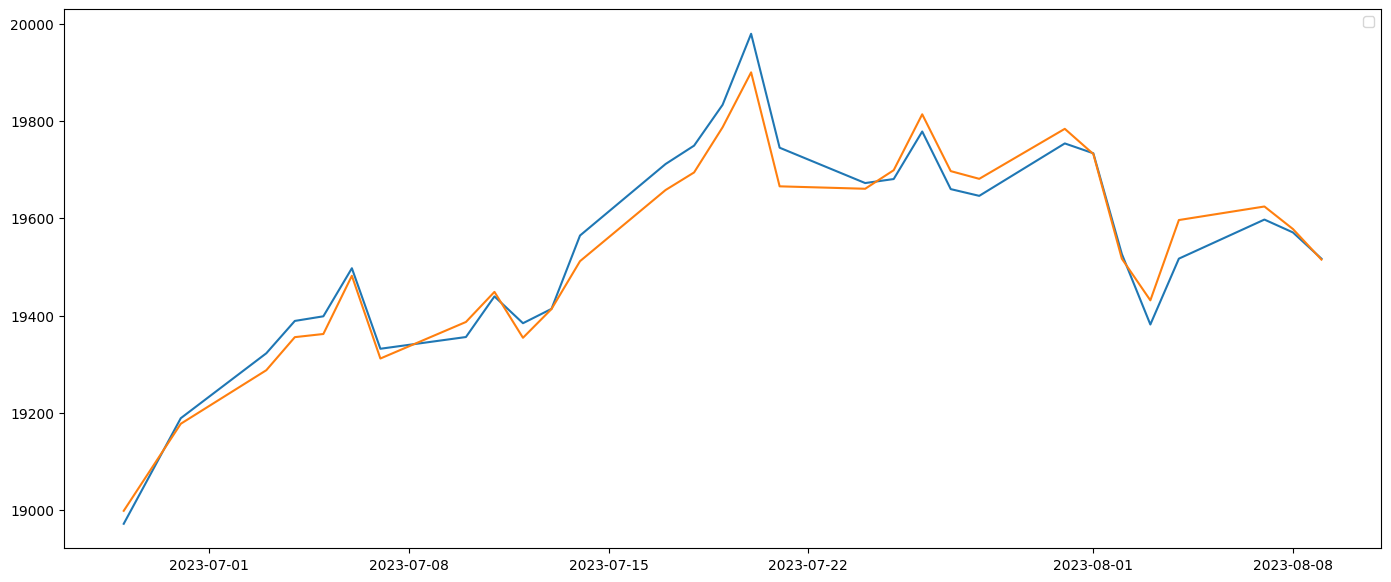

In [90]:
plt.figure(figsize=(17,7))
plt.plot(test_svm_df)
plt.legend()
plt.show()

In [91]:
fig=px.line(test_svm_df,x=test_svm_df.index,y=["Actual","Predicted"])
fig.show()

In [92]:
svm_test_r2= r2_score(test_svm_df.Actual, test_svm_df.Predicted)
svm_test_r2

0.9649600452937509

In [93]:
test_svm_mape=mape(test_svm_df.Actual, test_svm_df.Predicted)
test_svm_mape

0.16296835262637988

In [94]:
test_svm_rmse=rmse(test_svm_df.Actual, test_svm_df.Predicted)
test_svm_rmse

38.85788022076364

## Gradient Boosting 

In [95]:
gbm_model=GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, loss='ls')
gbm_model.fit(scaled_X,scaled_y)

InvalidParameterError: The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'huber', 'squared_error', 'quantile'}. Got 'ls' instead.

In [ ]:
scaled_y_train_pred_gbm = gbm_model.predict(scaled_x_train)
scaled_y_train_pred_gbm_df=pd.DataFrame(scaled_y_train_pred_gbm,columns=["scaled_y_train_pred_gbm"])
y_train_pred_gbm=scaler.inverse_transform(scaled_y_train_pred_gbm_df)
y_train_pred_gbm_df=pd.DataFrame(y_train_pred_gbm,columns=["y_train_pred_gbm"])
y_train_pred_gbm_df=y_train_pred_gbm_df.set_index(y_train.index)

In [ ]:
train_gbm_df=pd.DataFrame({"Actual":y_train.Close,"Predicted":y_train_pred_gbm_df.y_train_pred_gbm})
train_gbm_df

,Actual,Predicted
Date,,
2019-01-09,10855.150391,10855.073766
2019-01-10,10821.599609,10827.714820
2019-01-11,10794.950195,10794.138477
2019-01-14,10737.599609,10750.638405
2019-01-15,10886.799805,10879.955122
...,...,...
2022-09-05,17665.800781,17650.288855
2022-09-06,17655.599609,17665.825126
2022-09-07,17624.400391,17592.386272


No handles with labels found to put in legend.


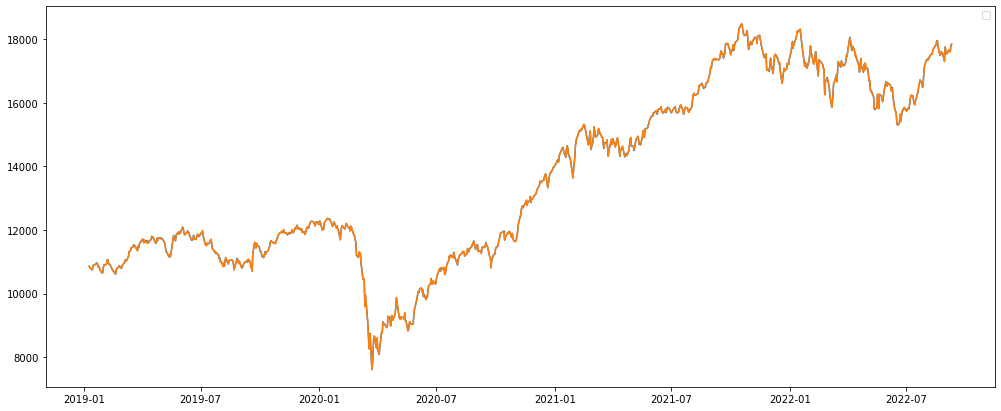

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train_gbm_df)
plt.legend()
plt.show()

In [ ]:
fig=px.line(train_gbm_df,x=train_gbm_df.index,y=["Actual","Predicted"])
fig.show()

In [ ]:
gbm_train_r2= r2_score(train_gbm_df.Actual, train_gbm_df.Predicted)
print("R2 square of gbm model is :",gbm_train_r2)
train_gbm_mape=mape(train_gbm_df.Actual, train_gbm_df.Predicted)
print("MAPE value of gbm model is :",train_gbm_mape)
train_gbm_rmse=rmse(train_gbm_df.Actual, train_gbm_df.Predicted)
print("RMSE value of gbm model is :",train_gbm_rmse)

R2 square of gbm model is : 0.9999689547088392
MAPE value of gbm model is : 0.0918343305018198
RMSE value of gbm model is : 15.481123499551524


## Gradient Boosting model testing

In [ ]:
scaled_y_test_pred_gbm = gbm_model.predict(scaled_x_test)

scaled_y_test_pred_gbm_df=pd.DataFrame(scaled_y_test_pred_gbm,columns=["scaled_y_test_pred_gbm"])
y_test_pred_gbm=scaler.inverse_transform(scaled_y_test_pred_gbm_df)

y_test_pred_gbm_df=pd.DataFrame(y_test_pred_gbm,columns=["y_test_pred_gbm"])
y_test_pred_gbm_df=y_test_pred_gbm_df.set_index(y_test.index)
test_gbm_df=pd.DataFrame({"Actual":y_test.Close,"Predicted":y_test_pred_gbm_df.y_test_pred_gbm})
test_gbm_df

,Actual,Predicted
Date,,
2022-09-12,17936.349609,17961.105083
2022-09-13,18070.050781,18080.269330
2022-09-14,18003.750000,17969.349559
2022-09-15,17877.400391,17900.213501
2022-09-16,17530.849609,17534.193731
...,...,...
2023-08-03,19381.650391,19366.345904
2023-08-04,19517.000000,19513.069269
2023-08-07,19597.300781,19599.737238


No handles with labels found to put in legend.


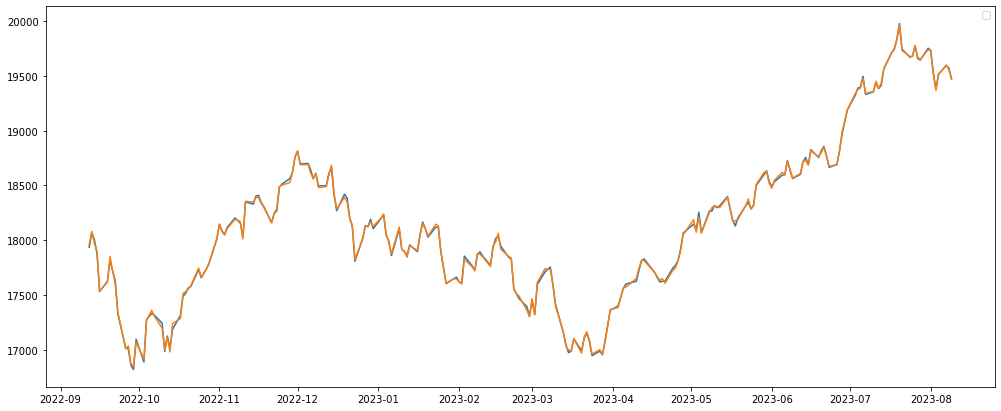

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(test_gbm_df)
plt.legend()
plt.show()

In [ ]:
fig=px.line(test_gbm_df,x=test_gbm_df.index,y=["Actual","Predicted"])
fig.show()

In [ ]:
gbm_test_r2= r2_score(test_gbm_df.Actual, test_gbm_df.Predicted)
print("R2 square of gbm model is :",gbm_test_r2)
test_gbm_mape=mape(test_gbm_df.Actual, test_gbm_df.Predicted)
print("MAPE value of gbm model is :",test_gbm_mape)
test_gbm_rmse=rmse(test_gbm_df.Actual, test_gbm_df.Predicted)
print("RMSE value of gbm model is :",test_gbm_rmse)

R2 square of gbm model is : 0.9994810415305098
MAPE value of gbm model is : 0.0725450274918482
RMSE value of gbm model is : 16.573063197022382


# Dataframe of training and testing scores of each model

In [ ]:
Model_train_df=pd.DataFrame({"Models (Train set)":["Random Forest","SVM","Gradiant Boosting"],
                      "R2 Score":[train_rf_r2,svm_train_r2,gbm_train_r2],
                        "RMSE":[train_rf_rmse,train_svm_rmse,train_gbm_rmse],
                     "MAPE":[train_rf_mape,train_svm_mape,train_gbm_mape]})
Model_train_df

,Models (Train set),R2 Score,RMSE,MAPE
0,Random Forest,0.999886,29.671809,0.144321
1,SVM,0.997393,141.870668,0.931522
2,Gradiant Boosting,0.999969,15.481123,0.091834


In [ ]:
Model_test_df=pd.DataFrame({"Models (test set)":["Random Forest","SVM","Gradiant Boosting"],
                      "R2 Score":[test_rf_r2,svm_test_r2,gbm_test_r2],
                        "RMSE":[test_rf_rmse,test_svm_rmse,test_gbm_rmse],
                     "MAPE":[test_rf_mape,test_svm_mape,test_gbm_mape]})
Model_test_df

,Models (test set),R2 Score,RMSE,MAPE
0,Random Forest,0.604405,457.574488,1.263890
1,SVM,0.959306,146.758433,0.698803
2,Gradiant Boosting,0.999481,16.573063,0.072545


## Here we can say , Gradient Boosting model gave us best accuracy and compare to other model. So we can use this model as a final model for further analysis.